This is the hello world program for tensorflow.  This basically just involves creating data that follows a line and then using a neural network model to fit this line.  For practise I implement the line using the functional API, the sequential api and using gradient tape.

Step 1 create the data

In [8]:
import tensorflow as tf
import numpy as np
import random
import math
random.seed(10)

In [9]:
true_m = 2.0
true_b = -4.0

In [41]:
NUM_EXAMPLES = 1000 
NOISE_FACTOR = 20
xs = [random.uniform(-math.pi, math.pi) for i in range(300)]


ys_pred = [abs(math.sin(true_m * x + true_b)) for x in xs]
xdata = np.array(xs)
ydata_pred = np.array(ys_pred)

In [42]:
# plotting the data
import matplotlib.pyplot as plt
import numpy as np

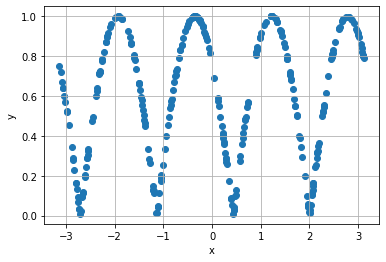

In [44]:
# True data expectation

fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')

ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()


In [77]:
# define sequential model
sequential_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])

sequential_model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

sequential_model.fit(xdata, ydata_pred, epochs=10)
sequential_model.summary()

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9031 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 700us/step - loss: 0.4027 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 707us/step - loss: 0.1958 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 700us/step - loss: 0.1431 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 800us/step - loss: 0.1415 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 900us/step - loss: 0.1313 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 800us/step - loss: 0.1292 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 900us/step - loss: 0.1257 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 800us/step - loss: 0.1375 - accuracy: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 0s 800us/step

In [79]:
# define the functional api model
inputs = tf.keras.Input(shape=(1))
x = tf.keras.layers.Dense(32)(inputs)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32)(x)
outputs = tf.keras.layers.Dense(1)(x)

functional_model = tf.keras.Model(inputs, outputs, name="keras_functional_api")
functional_model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
functional_model.fit(xdata, ydata_pred, epochs=10)
functional_model.summary()


Epoch 1/10
10/10 [==============================] - 0s 709us/step - loss: 0.3904 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 974us/step - loss: 0.2269 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 800us/step - loss: 0.1306 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 900us/step - loss: 0.1444 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 800us/step - loss: 0.1288 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 800us/step - loss: 0.1260 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 800us/step - loss: 0.1199 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 800us/step - loss: 0.1115 - accuracy: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 0s 800us/step

In [80]:
y_calc = sequential_model.predict(t)

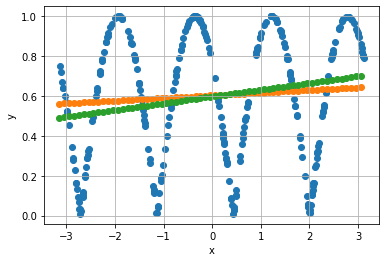

In [81]:
t = np.arange(-math.pi, math.pi, 0.1)
y_calc_sequential = sequential_model.predict(t)
y_calc_funcitonal = functional_model.predict(t)
fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')
ax.scatter(t, y_calc_sequential, c='tab:orange')
ax.scatter(t, y_calc_funcitonal, c='tab:green')


ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()
